[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a weekly competition to win FA...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
 label
ham     6
spam    4
Name: count, dtype: int64

Accuracy: 1.0


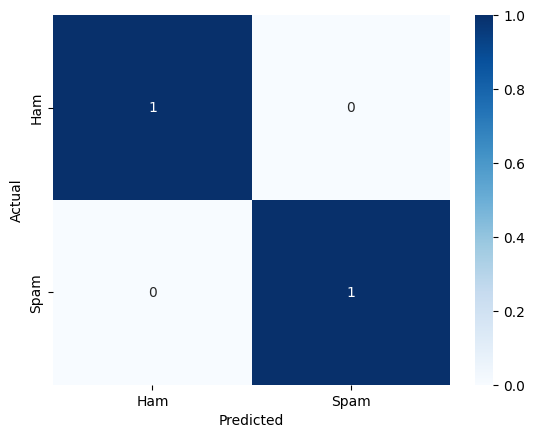


Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Ham
Ham


In [4]:
# SMS Spam Detection Using Naive Bayes

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nltk.download('stopwords')

# 2. Load Dataset
file_path = "/content/SMSSpamCollection.txt"
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])
print(df.head())
print("\nLabel distribution:\n", df['label'].value_counts())

# 3. Preprocess Text
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)

# 4. Split Data (Stratified to maintain class distribution)
X = df['clean_message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # ✅ stratify=y fixes the warning
)

# 5. Convert Text to Features
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 6. Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 7. Evaluate Model
y_pred = model.predict(X_test_tfidf)
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix (explicitly provide labels to avoid warning)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham','Spam']))

# 8. Predict New Messages
def predict_spam(message):
    message_clean = clean_text(message)
    message_tfidf = tfidf.transform([message_clean])
    prediction = model.predict(message_tfidf)[0]
    return "Spam" if prediction == 1 else "Ham"

# Test predictions
print(predict_spam("Congratulations! You won a free ticket to Bahamas!"))
print(predict_spam("Hey, are we meeting for lunch today?"))
